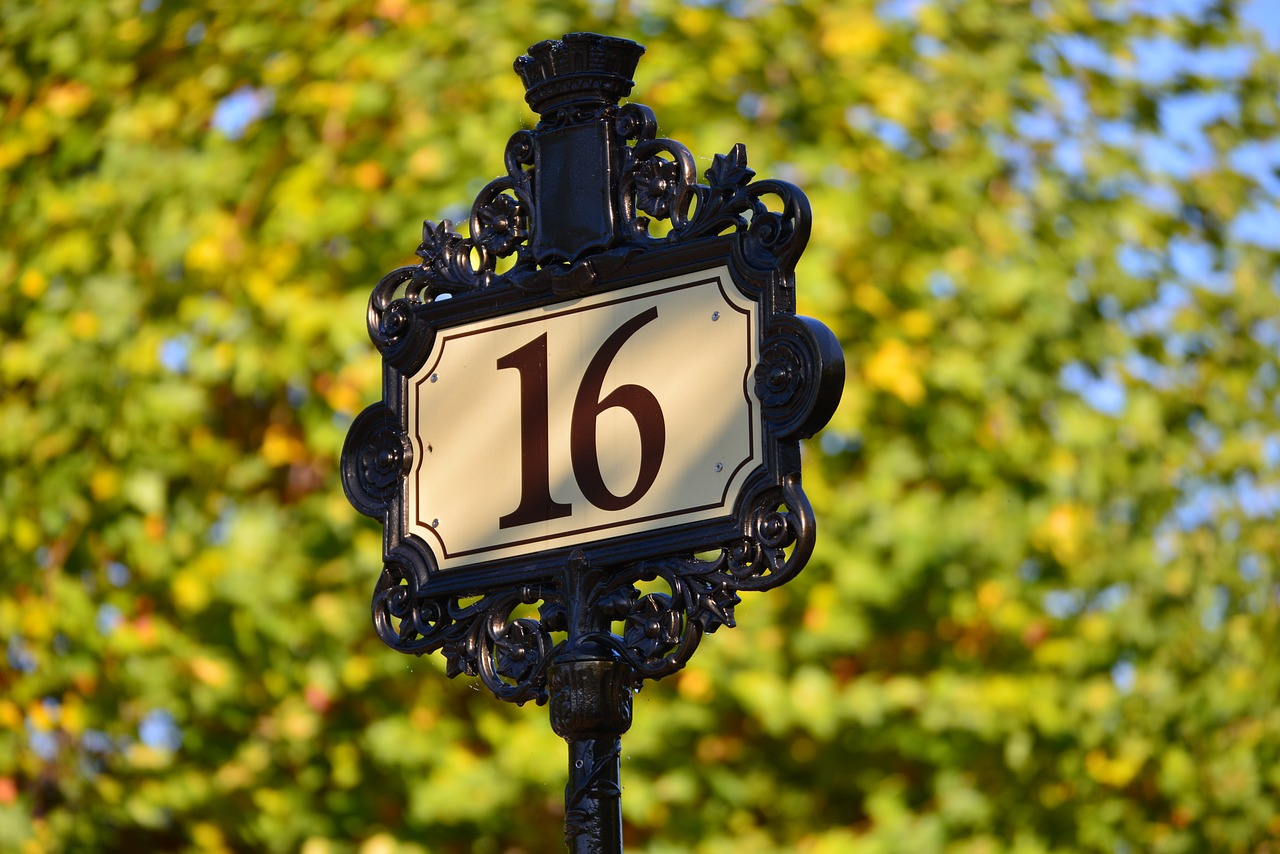
Source: Pixabay

# **Street View Housing Number Digit Recognition**
--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural settings. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various computer vision fields.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

Objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

## **Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd

# plotting library imports
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras import regularizers

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing different layers and optimizers
from tensorflow.keras.layers import  Activation, BatchNormalization, Conv2D, Dense, Dropout, ELU, Flatten, LeakyReLU, MaxPooling2D, ReLU
from tensorflow.keras.losses import categorical_crossentropy
tf.keras.optimizers.legacy.Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

**Let us check the version of tensorflow.**

In [2]:
print(tf.__version__)

2.13.0-rc1


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py

# Open the file as read only in Data directory
h5f = h5py.File('Data/SVHN_single_grey1.h5', 'r')

# Create train and test the datasets 
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

# Close file
h5f.close()

Check the number of images in the training and the testing dataset.

In [5]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- 60,000 images with 70/30 train to test split

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use y_train to print the first 10 labels.

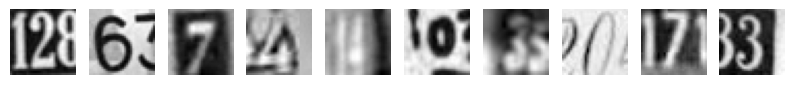

Target label for each of the above images: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# Visualizing the first 10 images in the dataset with target labels

plt.figure(figsize = (10, 1))

for i in range(10):

    # subplot parameters: subplot(nrows, ncolumns, index, **kwaargs)
    plt.subplot(1, 10, i+1)

    # cmap='gray', RGB: vmin=0, vmax=255
    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('Target label for each of the above images: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [7]:
print('X_train 1st Image Shape:', X_train[0].shape, '\n')

print('First Image Array: \n', X_train[0])

X_train 1st Image Shape: (32, 32) 

First Image Array: 
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**
- Reshape data - 32 x 32 2D array --> 1,032 1D arrays
- Normalization - scale all inputs by dividing by 255 (pixel input range) to values between 0-1, improves convergence & reduces overfitting. 


In [8]:
# Reshaping the 2D image datasets to 1D

X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

In [9]:
# Normalization/Scaling - dividing each input by the range of image pixel values

X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

Print the shapes of Training and Test data

In [10]:
# Train and Test Reshaping
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**
The output for this classification problem will have 10 neurons, thus each categorical variable is transfromed into a binary vector length equal to the number of categories.  This allows the categorical features to be treated as numercial and enables the model to learn the relationships between the categories and the target variable.

In [11]:
# one-hot encoded representation of target labels

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
y_test_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:** 
- Each target label is encoded as a vector now.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [12]:
np.random.seed(23)
import random
random.seed(23)
tf.random.set_seed(23)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [13]:
# 1st Sequential ANN Model Functionj

def nn_model_1():
    ann_model = Sequential()

    # First hidden layer with 64 neurons
    ann_model.add(Dense(64, activation='relu', input_shape=(1024,)))

    # Second hidden layer with 32 neurons
    ann_model.add(Dense(32, activation='relu'))

    # Output layer with 10 nodes
    ann_model.add(Dense(10, activation='softmax'))
    
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)
    
    # Compile the model
    ann_model.compile(optimizer, 
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    return ann_model

In [14]:
# Call model build function
ann_model_1 = nn_model_1()

In [15]:
# Model summary
ann_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Plot the Training and Validation Accuracies and write down your Observations.**

In [16]:
history_1 = ann_model_1.fit(
            X_train_normalized, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            shuffle=True,
            batch_size=128,
            verbose=1
)

Epoch 1/20
263/263 [==============================] - 0s 1ms/step - loss: 2.2948 - accuracy: 0.1184 - val_loss: 2.2626 - val_accuracy: 0.1532
Epoch 2/20
263/263 [==============================] - 0s 904us/step - loss: 2.1622 - accuracy: 0.1978 - val_loss: 2.0119 - val_accuracy: 0.2925
Epoch 3/20
263/263 [==============================] - 0s 847us/step - loss: 1.8222 - accuracy: 0.3777 - val_loss: 1.6517 - val_accuracy: 0.4569
Epoch 4/20
263/263 [==============================] - 0s 872us/step - loss: 1.5627 - accuracy: 0.4831 - val_loss: 1.5045 - val_accuracy: 0.5019
Epoch 5/20
263/263 [==============================] - 0s 850us/step - loss: 1.4450 - accuracy: 0.5259 - val_loss: 1.4241 - val_accuracy: 0.5349
Epoch 6/20
263/263 [==============================] - 0s 844us/step - loss: 1.3627 - accuracy: 0.5605 - val_loss: 1.3172 - val_accuracy: 0.5802
Epoch 7/20
263/263 [==============================] - 0s 830us/step - loss: 1.3006 - accuracy: 0.5843 - val_loss: 1.2751 - val_accuracy: 0

### **ANN Model Evaluation**

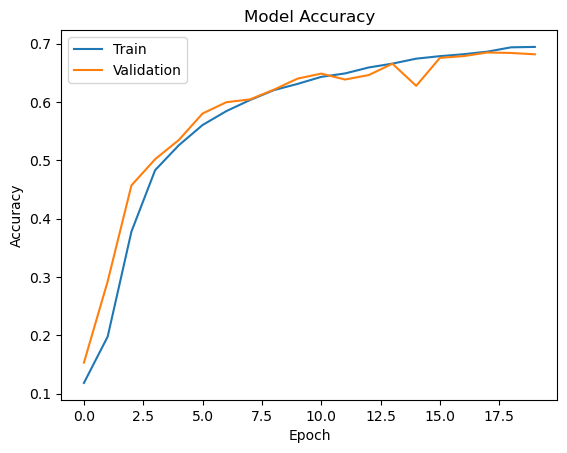

In [17]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
- Testing accuracy corresponds well with training but the learning rate starts to level off at 17.5 epochs.
- More complex models with addtional nodes, layers, parameters, and epochs may improve performance.

Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [18]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

In [19]:
np.random.seed(23)
import random
random.seed(23)
tf.random.set_seed(23)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [20]:
# 2nd Sequential ANN Model Function

def nn_model_2():
    ann_model = Sequential()

    # First hidden layer with 256 neurons
    ann_model.add(Dense(256, activation='relu', input_shape=(1024,)))

    # Second hidden layer with 128 neurons
    ann_model.add(Dense(128, activation='relu'))

    # Dropout layer with the rate = 0.2
    ann_model.add(Dropout(0.2))

    # Third hidden layer with 64 neurons
    ann_model.add(Dense(64, activation='relu'))

    # Fourth hidden layer with 64 neurons
    ann_model.add(Dense(64, activation='relu'))

    # Fifth hidden layer with 32 neurons
    ann_model.add(Dense(32, activation='relu'))

    # Output layer with 10 nodes
    ann_model.add(Dense(10, activation='softmax'))
    
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0005)
    
    # Compile the model
    ann_model.compile(optimizer, 
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
    return ann_model

In [21]:
# Call the second model build function
ann_model_2 = nn_model_2()

In [22]:
# Model summary
ann_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                3

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [23]:
history_2 = ann_model_2.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            batch_size=128,
            verbose=1
)

Epoch 1/30
263/263 [==============================] - 1s 2ms/step - loss: 2.3048 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.0995
Epoch 2/30
263/263 [==============================] - 1s 2ms/step - loss: 2.3015 - accuracy: 0.1067 - val_loss: 2.2755 - val_accuracy: 0.1271
Epoch 3/30
263/263 [==============================] - 1s 2ms/step - loss: 2.1018 - accuracy: 0.1936 - val_loss: 1.9201 - val_accuracy: 0.2598
Epoch 4/30
263/263 [==============================] - 1s 2ms/step - loss: 1.9036 - accuracy: 0.2707 - val_loss: 1.7728 - val_accuracy: 0.3487
Epoch 5/30
263/263 [==============================] - 1s 2ms/step - loss: 1.7035 - accuracy: 0.3910 - val_loss: 1.5928 - val_accuracy: 0.4440
Epoch 6/30
263/263 [==============================] - 1s 2ms/step - loss: 1.5033 - accuracy: 0.4826 - val_loss: 1.3605 - val_accuracy: 0.5532
Epoch 7/30
263/263 [==============================] - 1s 2ms/step - loss: 1.3923 - accuracy: 0.5307 - val_loss: 1.3305 - val_accuracy: 0.5623
Epoch 

**ANN Model 2 Evaluation**

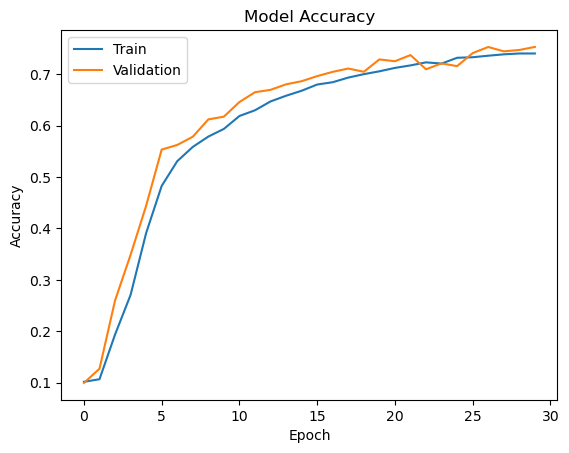

In [24]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
- Test accuracy consistently improves along with the Training Accuracy, thus overfitting is not an issue and indicates that model improvements may be possible with further refinements.

## **Evaluating the model on the test data**

In [25]:
accuracy = ann_model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

563/563 - 0s - loss: 0.7904 - accuracy: 0.7569 - 242ms/epoch - 430us/step


## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [26]:
# Predictions as probabilities for each category
y_pred = ann_model_2.predict(X_test_normalized)

563/563 [==============================] - 0s 411us/step


### **Plotting the Confusion Matrix**
- The Confusion Matrix expects categorical input values, however y_test_encoded is an encoded value, and y_pred has probablities. So these values have to be converted back categorical values using the argmax() function to obtain the maximum value over each category on both y_test_encoded and test_pred with their respective classes.

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [27]:
# Converting each entry to single label from one-hot encoded vector
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.73      0.80      0.77      1814
           1       0.69      0.83      0.76      1828
           2       0.85      0.73      0.79      1803
           3       0.72      0.72      0.72      1719
           4       0.79      0.82      0.80      1812
           5       0.72      0.72      0.72      1768
           6       0.78      0.75      0.76      1832
           7       0.75      0.81      0.78      1808
           8       0.78      0.68      0.73      1812
           9       0.78      0.70      0.74      1804

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



<Axes: >

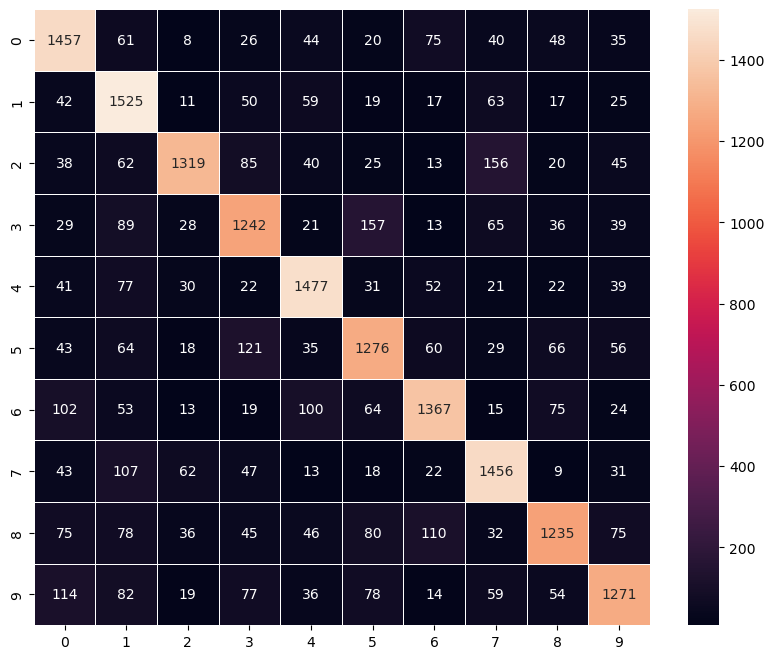

In [28]:
from sklearn.metrics import classification_report

# Classification report for true and predicted values
print(classification_report(y_test_arg, y_pred_arg))

# Plotting the Confusion Matrix using confusion matrix() from the tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap( 
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

**Final Observations:**

**Classification Report**
- Precision captured the accuracy of positive predictions using the ratio of true positive (TP) predictions to the total number of positive (TP + false positive (FP)) predictions. The best precision is for Class 8 at 0.80 which means that 20% of predictions are false positive and therefore the model is not a good predictor as yet.
- Recall measured the models correctly identified positive instances by calculating ratio of true positive (TP) predictions to the total number of positive (TP + false negative (FN)) instances.
- F1-score provides a balanced measure of precision and recall as a summary metric for classification performance.
- Support: number of instances in each class.
- macro-average: performance measure of the model for each class.

**Confusion Matrix**
- Errors throughout for all classes with 3 misclassified the most as 5 in 160 instances.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [29]:
import h5py

# Open the file as read only
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

h5f.close()

Check the number of images in the training and the testing dataset.

In [30]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [31]:
# Printing the shape and pixel array for the first image in the training dataset
print('Training Array Shape:', X_train[0].shape)
print("First image pixel array:\n", X_train[0])

Training Array Shape: (32, 32)
First image pixel array:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [32]:
# Reshaping the 2D image datasets to 4D to pass them to CNNs
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [33]:
# Normalize inputs from 0-255 to 0-1
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

Print New shape of Training and Test

In [34]:
print('Training set shape:', X_train_normalized.shape, y_train.shape)
print('Test set shape:', X_test_normalized.shape, y_test.shape)

Training set shape: (42000, 32, 32, 1) (42000,)
Test set shape: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [35]:
# one-hot encoded representation of target labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
y_test_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation: each target variable is a one-hot encoded vector instead of single digit label**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [36]:
np.random.seed(23)
import random
random.seed(23)
tf.random.set_seed(23)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [39]:
# First CNN Model Defintion
def cnn_model_1():

    # Intializing a sequential model
    model = Sequential()

    # First convolutional layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
    model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1), kernel_regularizer=regularizers.l2(0.01)))

    # Adding LeakyReLU layer to the model
    model.add(LeakyReLU(0.1))

    # Second convolutional layer with 32 filters and kernel size 3x3 , 'same' padding
    model.add(Conv2D(32, (3, 3), padding="same", kernel_regularizer=regularizers.l2(0.01)))

    # Adding another LeakyReLU layer to the model
    model.add(LeakyReLU(0.1))

    # Adding max pooling to reduce the size of output of conv layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())

    # Adding a fully connected dense layer with 32 neurons    
    model.add(Dense(32))

    # Adding another LeakyReLU layer to the model
    model.add(LeakyReLU(0.1))

    # Adding the output layer with 10 neurons and activation function as softmax since this is a multi-class classification problem  
    model.add(Dense(10, activation='softmax'))

    # Using Adam Optimizer
    opt = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

    # Compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [40]:
cnn_model_1 = cnn_model_1()

In [ ]:
cnn_model_1.summary()

In [41]:
cnn_history_1 = cnn_model_1.fit(
                      X_train_normalized, y_train_encoded,
                      validation_split=0.2,
                      batch_size=32,
                      verbose=1,
                      epochs=20                      
)

Epoch 1/20
1050/1050 [==============================] - 7s 7ms/step - loss: 1.4272 - accuracy: 0.5555 - val_loss: 0.8335 - val_accuracy: 0.7926
Epoch 2/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.7299 - accuracy: 0.8215 - val_loss: 0.7186 - val_accuracy: 0.8273
Epoch 3/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.6256 - accuracy: 0.8476 - val_loss: 0.6266 - val_accuracy: 0.8527
Epoch 4/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.5699 - accuracy: 0.8624 - val_loss: 0.5986 - val_accuracy: 0.8570
Epoch 5/20
1050/1050 [==============================] - 7s 7ms/step - loss: 0.5300 - accuracy: 0.8715 - val_loss: 0.6018 - val_accuracy: 0.8563
Epoch 6/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.5013 - accuracy: 0.8774 - val_loss: 0.5728 - val_accuracy: 0.8631
Epoch 7/20
1050/1050 [==============================] - 7s 6ms/step - loss: 0.4761 - accuracy: 0.8867 - val_loss: 0.5656 - val_accuracy:

### **Plot the Training and Validation Accuracies and Write your observations.**

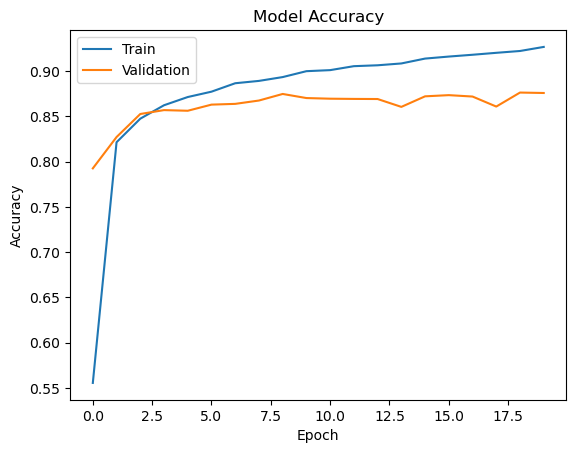

In [42]:
plt.plot(cnn_history_1.history['accuracy'])
plt.plot(cnn_history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Model Observations:**
The model is overfitting on the train data which shows accuracy gains with each epoch iteration while the validation split accuracy nearly peaks after only three epochs.  Further improvements may be possible with some tuning:
- Add dropout or regularization layers or early stopping, these techniques impose penalties to discourage overfitting.
- Reduce model complexity by reducing the number of parameters, nodes, or layers.
- Increase the subset size of the Train/Test dataset from the original data, h5py contains only 10% (60,000 of the 600,000 images) in the SVHN dataset.

### **Evaluating the model on test data**

In [43]:
accuracy = cnn_model_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

563/563 - 1s - loss: 0.5523 - accuracy: 0.8707 - 964ms/epoch - 2ms/step


Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [44]:
# Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [45]:
# Fixing seed for second CNN model
np.random.seed(23)
import random
random.seed(23)
tf.random.set_seed(23)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [47]:
# Second CNN Model Defintion
def cnn_model_2():

    # Intializing a sequential model
    model = Sequential()

    # First convolutional layer with 16 filters and kernel size 3x3 , padding 'same' with input_shape = (32, 32, 1)
    model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))

    # Adding the LeakyReLU layer to the model
    model.add(LeakyReLU(0.1))

    # Second convolutional layer with 32 filters and kernel size 3x3 , 'same' padding
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
  
    # Adding max pooling to reduce the size of output of convolutional layer and batch normalization
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
  
    # Third convolutional layer with 32 filters and kernel size 3x3 , 'same' padding
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))

    # Fourth convolutional layer with 64 filters and kernel size 3x3 , 'same' padding
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
    model.add(Flatten())

    # Fully connected dense layer with 32 neurons    
    model.add(Dense(32))
    model.add(ReLU(0.1))

    # Adding dropout layer
    model.add(Dropout(0.5))

    # Adding the output layer with 10 neurons and activation function as softmax since this is a multi-class classification problem  
    model.add(Dense(10, activation='softmax'))

    # Using Adam Optimizer
    opt = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)
    # opt = SGD(learning_rate=0.01, momentum=0.9)

    # Compile model
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [48]:
cnn_model_2 = cnn_model_2()

In [49]:
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [50]:
cnn_history_2 = cnn_model_2.fit(
                      X_train_normalized, y_train_encoded,
                      validation_split=0.2,
                      batch_size=128,
                      epochs=30,
                      verbose=1
)

Epoch 1/30
263/263 [==============================] - 11s 40ms/step - loss: 2.3062 - accuracy: 0.1013 - val_loss: 2.3039 - val_accuracy: 0.0999
Epoch 2/30
263/263 [==============================] - 10s 39ms/step - loss: 2.3067 - accuracy: 0.0992 - val_loss: 2.3037 - val_accuracy: 0.0968
Epoch 3/30
263/263 [==============================] - 10s 39ms/step - loss: 2.3056 - accuracy: 0.0992 - val_loss: 2.3039 - val_accuracy: 0.0994
Epoch 4/30
263/263 [==============================] - 11s 40ms/step - loss: 2.3047 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.1042
Epoch 5/30
263/263 [==============================] - 10s 40ms/step - loss: 2.3041 - accuracy: 0.1039 - val_loss: 2.3028 - val_accuracy: 0.1056
Epoch 6/30
263/263 [==============================] - 11s 41ms/step - loss: 2.3039 - accuracy: 0.1006 - val_loss: 2.3026 - val_accuracy: 0.1023
Epoch 7/30
263/263 [==============================] - 11s 41ms/step - loss: 2.3037 - accuracy: 0.1026 - val_loss: 2.3029 - val_accuracy:

### **Plot the Training and Validation accuracies and write your observations.**

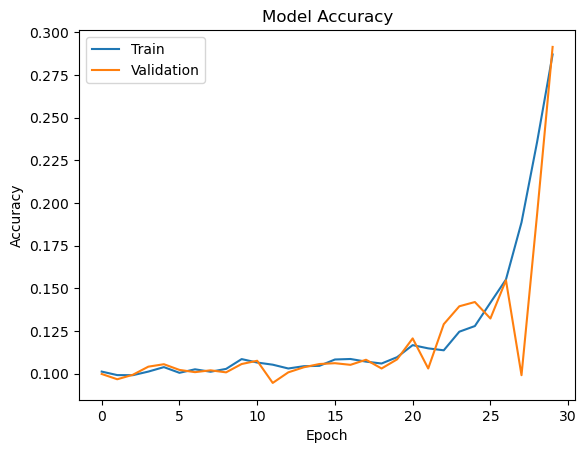

In [51]:
from matplotlib import legend
plt.plot(cnn_history_2.history['accuracy'])
plt.plot(cnn_history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**
- Inconsistent train and validation results suggests that a larger training dataset and hyperparameter tuning is required.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.** 

In [52]:
y_pred_cnn = cnn_model_2.predict(X_test_normalized)

563/563 [==============================] - 3s 5ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [53]:
# Converting each entry to single label from one-hot encoded vector
# Obtaining the categorical values from y_test_encoded and y_pred_cnn
y_test_arg=np.argmax(y_test_encoded,axis=1)
y_pred_arg=np.argmax(y_pred_cnn,axis=1)

### **Final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.16      0.13      0.15      1814
           1       0.21      0.91      0.34      1828
           2       0.58      0.19      0.29      1803
           3       0.33      0.01      0.02      1719
           4       0.29      0.34      0.32      1812
           5       0.46      0.49      0.48      1768
           6       0.46      0.14      0.21      1832
           7       0.62      0.33      0.43      1808
           8       0.32      0.02      0.04      1812
           9       0.22      0.27      0.24      1804

    accuracy                           0.29     18000
   macro avg       0.37      0.28      0.25     18000
weighted avg       0.37      0.29      0.25     18000



<Axes: >

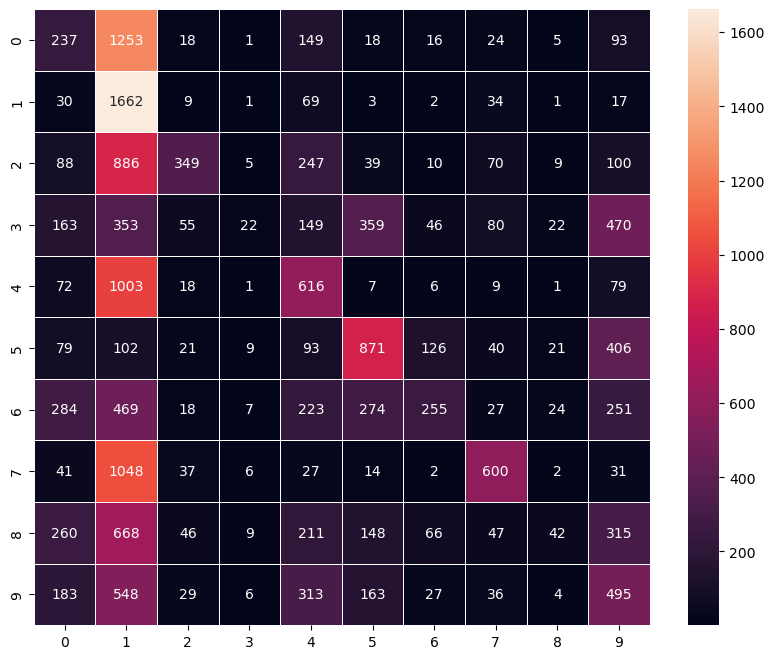

In [54]:
from sklearn.metrics import classification_report

# Classification report for true and predicted values
print(classification_report(y_test_arg, y_pred_arg))

# Plotting the Confusion Matrix using confusion matrix() from the tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap( 
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

**Final Observations:**
- The second CNN model performs poorly as shown in the Model Accuracy chart above - the Validation curve has peaks and valleys above and below the Training curve.  The fluctuactions indicate that model performance is not aligned between the Test and Validation datasets.  cnn_model_2 may be too complex and a simpler model similar to cnn_model_1 is a starting point.
- Insufficient Training Data may relate to the models poor performance as well.
- Hyperparameter Settings: Learning Rate settings may also be an issue for cnn_model_2, the Adam optimizer with a learning_rate=0.001 does not perform as well as the SGD optmizer with learning_rate=0.01 and momentum=0.9 (results not shown).
- Overall, the first CNN model, cnn_model_1 performed the best on the test data at 0.8713 with 267,306 parameters, however the second ANN model, ann_model_2 performed better than cnn_model_2 with an F1 score of 0.75, however that ANN model also has 310,122 parameters and is computational expensive compared to the 164,362 parameters in the the second CNN Model.
- Improved CNN model performance recommendation:  Build a CNN model configured like cnn_model_1 using a SGD optimizer with a learning rate = 0.01 and add a Dropout layer with rate=0.5 to discourage overfitting combined with a larger Train/Test dataset (180,000 images).

### **Evaluating the second cnn model on test data**

In [55]:
accuracy = cnn_model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

563/563 - 3s - loss: 2.1041 - accuracy: 0.2861 - 3s/epoch - 5ms/step
